In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf # 회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

In [12]:
model = ["LogisticRegression", "DecisionTree", "RandomForest", "XGBoost", "SVM"]
Accuracy = []; F1_score = []

# 모델별 평가 결과
df_eval_c = pd.DataFrame(index = model)
df_eval_c["TestAccuracy"] = [0.881, 0.978, 0.934, 0.9779, 0.912]
df_eval_c["F1_score"] = [0.906, 0.971, 0.907, 0.9822, 0.881]
print(df_eval_c.round(3))

# 모델별 평가 결과
df_eval_t = pd.DataFrame(index = model)
df_eval_t["TestAccuracy"] = [0, 0.945, 0.945, 0.9452, 0.932]
df_eval_t["F1_score"] = [0, 0.500, 0.500, 0.9710, 0.286]
print(df_eval_t.round(3))

                    TestAccuracy  F1_score
LogisticRegression         0.881     0.906
DecisionTree               0.978     0.971
RandomForest               0.934     0.907
XGBoost                    0.978     0.982
SVM                        0.912     0.881
                    TestAccuracy  F1_score
LogisticRegression         0.000     0.000
DecisionTree               0.945     0.500
RandomForest               0.945     0.500
XGBoost                    0.945     0.971
SVM                        0.932     0.286


In [13]:
print(df_eval_c.T)
print(df_eval_t.T)

              LogisticRegression  DecisionTree  RandomForest  XGBoost    SVM
TestAccuracy               0.881         0.978         0.934   0.9779  0.912
F1_score                   0.906         0.971         0.907   0.9822  0.881
              LogisticRegression  DecisionTree  RandomForest  XGBoost    SVM
TestAccuracy                 0.0         0.945         0.945   0.9452  0.932
F1_score                     0.0         0.500         0.500   0.9710  0.286


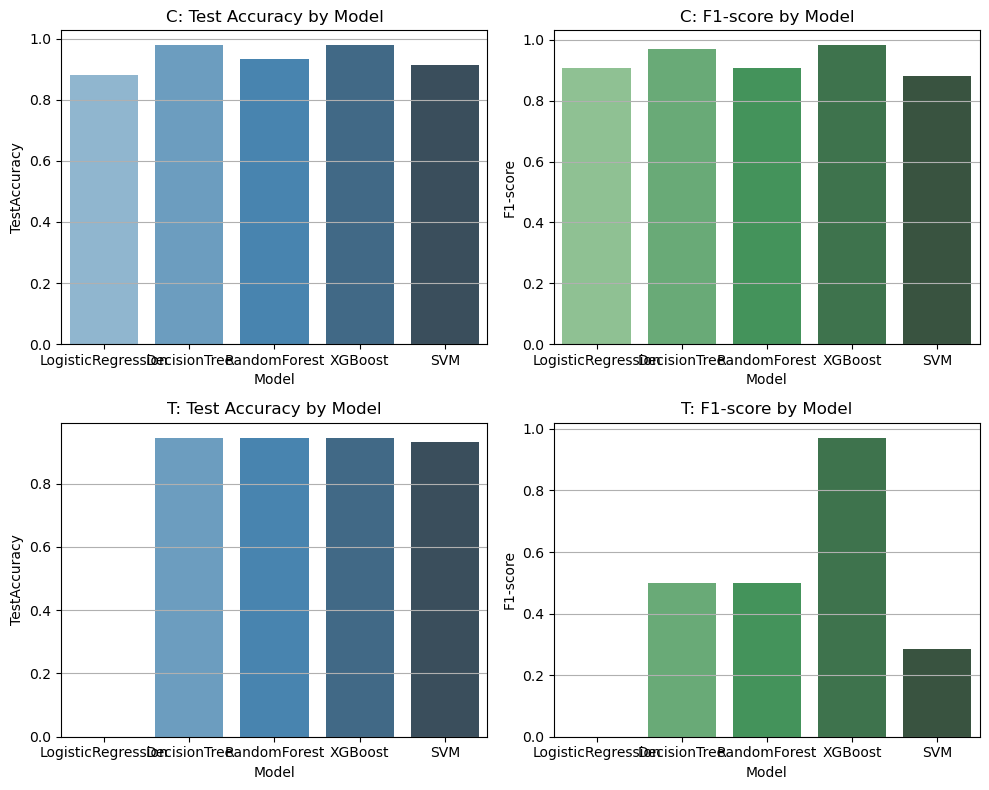

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2행 2열의 서브플롯 생성

# 첫 번째 서브플롯: C - Test Accuracy
sns.barplot(x=df_eval_c.index, y='TestAccuracy', data=df_eval_c, ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('C: Test Accuracy by Model')
axes[0, 0].set_ylabel('TestAccuracy')
axes[0, 0].set_xlabel('Model')
axes[0, 0].grid(axis="y")

# 두 번째 서브플롯: C - F1-score
sns.barplot(x=df_eval_c.index, y='F1_score', data=df_eval_c, ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('C: F1-score by Model')
axes[0, 1].set_ylabel('F1-score')
axes[0, 1].set_xlabel('Model')
axes[0, 1].grid(axis="y")

# 세 번째 서브플롯: T - Test Accuracy
sns.barplot(x=df_eval_t.index, y='TestAccuracy', data=df_eval_t, ax=axes[1, 0], palette='Blues_d')
axes[1, 0].set_title('T: Test Accuracy by Model')
axes[1, 0].set_ylabel('TestAccuracy')
axes[1, 0].set_xlabel('Model')
axes[1, 0].grid(axis="y")

# 네 번째 서브플롯: T - F1-score
sns.barplot(x=df_eval_t.index, y='F1_score', data=df_eval_t, ax=axes[1, 1], palette='Greens_d')
axes[1, 1].set_title('T: F1-score by Model')
axes[1, 1].set_ylabel('F1-score')
axes[1, 1].set_xlabel('Model')
axes[1, 1].grid(axis="y")

plt.tight_layout()
plt.show()


## 5. 요약 및 결론

+ 단일 모델모다 앙상블 모델의 설명력이 확실히 우수한 것을 확인할 수 있음. 따라서 설명력을 기준으로 했을 때 **Gradient Boosting**을 선택.
+ 하지만 앙상블 모델은 직관적인 결과 해석의 측면에서 명확한 한계점을 보이므로, 단일 모델 중 설명력이 더 좋은 **Decision Tree**를 선택하는 대안 역시 고려해볼 수 있음.